# Dataset: macrotrends crude oil csv

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload=files.upload()

Saving macrotrends crude oil.csv to macrotrends crude oil.csv


In [ ]:
df = pd.read_csv('macrotrends crude oil.csv') # Loading Dataset

# Visualization and Data Preprocessing

In [ ]:
df.head(10)

,date,value
0,07-02-2011,86.30
1,08-02-2011,85.85
2,09-02-2011,85.59
3,10-02-2011,85.44
4,11-02-2011,84.39
5,14-02-2011,83.66
6,15-02-2011,83.13
7,16-02-2011,83.80
8,17-02-2011,85.05
9,18-02-2011,85.03


In [ ]:
df.shape

(3313, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3313 non-null   object 
 1    value  3292 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.9+ KB


In [ ]:
df.isnull().sum()

date       0
 value    21
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

date      0
 value    0
dtype: int64

In [ ]:
df.head()

,date,value
0,07-02-2011,86.30
1,08-02-2011,85.85
2,09-02-2011,85.59
3,10-02-2011,85.44
4,11-02-2011,84.39


In [ ]:
df.columns

Index(['date', ' value'], dtype='object')

In [ ]:
df['date']=pd.to_datetime(df['date'])

<ipython-input-12-c85e97b4fa21>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']=pd.to_datetime(df['date'])


In [ ]:
df.rename(columns={' value':'price'},inplace=True)

In [ ]:
df

,date,price
0,2011-07-02,86.30
1,2011-08-02,85.85
2,2011-09-02,85.59
3,2011-10-02,85.44
4,2011-11-02,84.39
...,...,...
3287,2024-01-30,77.79
3288,2024-01-31,75.85
3289,2024-01-02,73.82
3290,2024-02-02,72.41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3292 entries, 0 to 3291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3292 non-null   datetime64[ns]
 1   price   3292 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 77.2 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3292.0,71.165593,22.598418,11.258,51.645,70.015,92.44,123.7


<Axes: xlabel='date', ylabel='price'>

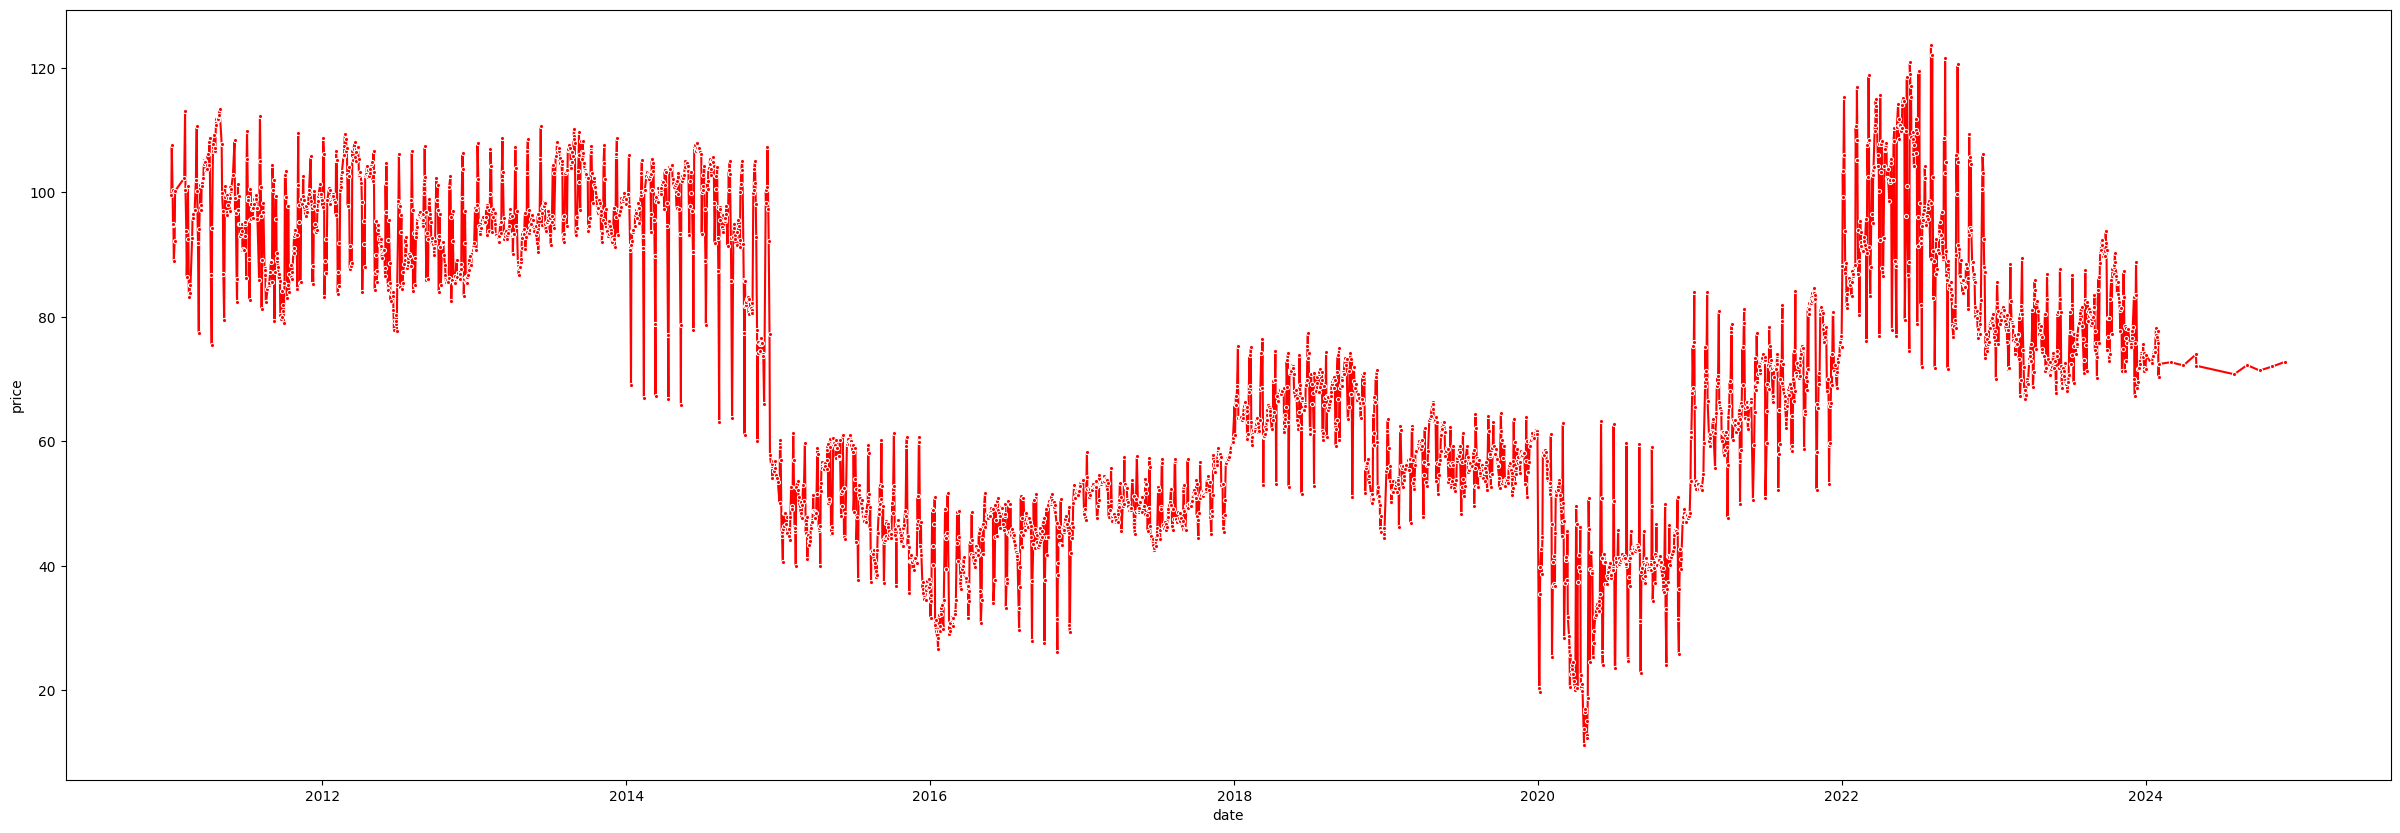

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.lineplot(data=df,x ="date",y ="price",color = "red",marker = ".")

In [ ]:
import statsmodels.api as smf

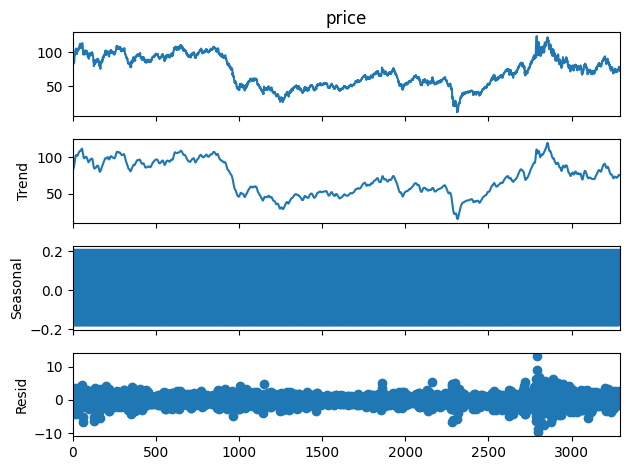

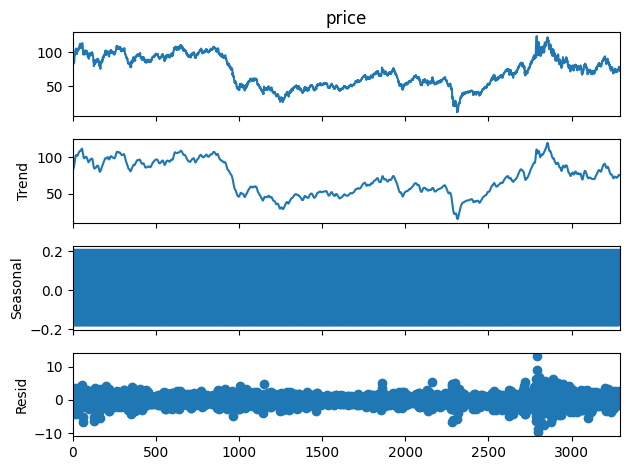

In [ ]:
seasonal_ts_add=smf.tsa.seasonal_decompose(df["price"],period=10)
seasonal_ts_add.plot()

<Axes: >

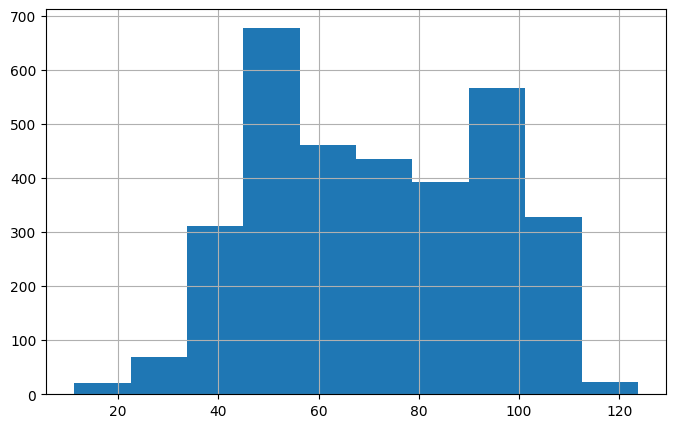

In [ ]:
# Histogram
df['price'].hist(figsize=(8,5))

<Axes: ylabel='Density'>

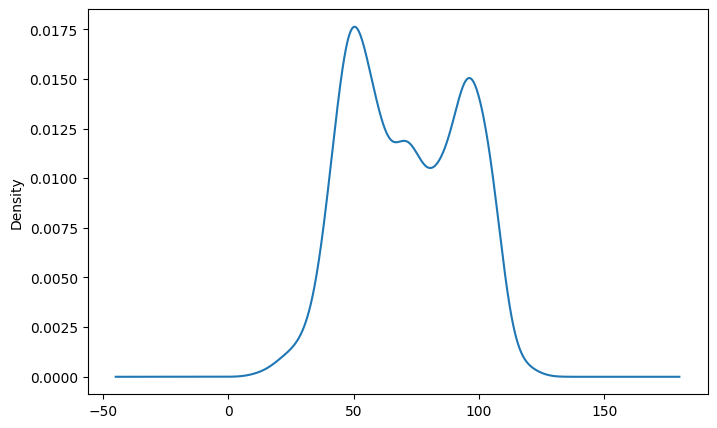

In [ ]:
# Density Plot
df['price'].plot(kind = 'kde', figsize=(8,5))

<Axes: ylabel='price'>

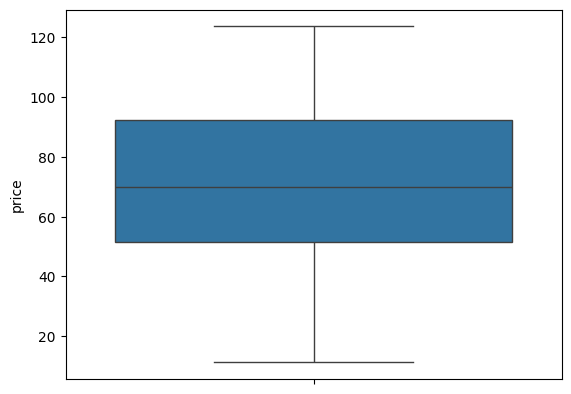

In [ ]:
sns.boxplot(data=df['price'])

In [ ]:
df[df['price']>115]

,date,price
2788,2022-04-03,115.680
2789,2022-07-03,119.400
2790,2022-08-03,123.700
2848,2022-05-27,115.070
2850,2022-01-06,115.260
2851,2022-02-06,116.870
2852,2022-03-06,118.870
2853,2022-06-06,118.500
2854,2022-07-06,119.410
2855,2022-08-06,122.110


**Oil prices were on peak during this period due to decresed inventory of crude oil in second quarter of year & the low inventory was due to Russia ukraine war in first quarter of the year.**

In [ ]:
df[df['price']<20]

,date,price
2308,2020-04-15,19.870
2311,2020-04-21,11.258
2312,2020-04-22,13.780
2313,2020-04-23,16.500
2314,2020-04-24,16.940
2315,2020-04-27,12.780
2316,2020-04-28,12.340
2317,2020-04-29,15.060
2318,2020-04-30,18.840
2319,2020-01-05,19.780


**Oil prices dropped in this period due low demand due to COVID-19.**

- Major shift

In [ ]:
Price_bef_2015=df['price'][df['date']<'2015-03-01'].mean()
print('Mean Price before 2015=',round(Price_bef_2015,2))
Price_bw_2015_2020=df['price'][(df['date']>'2015-03-01') & (df['date']<'2020-03-01')].mean()
print('Mean Price between 2015 & 2020=',round(Price_bw_2015_2020,2))
dev=(Price_bw_2015_2020/Price_bef_2015)-1
print('%Deviation between price of both periods=',round(dev*100,2),'%')

Mean Price before 2015= 93.36
Mean Price between 2015 & 2020= 52.91
%Deviation between price of both periods= -43.33 %


**Major change between these two periods due to supply factor. In this duration US supply was in boom which reduced oil prices globaly.Boom in supply was due to advancement in drilling technologies & allowing free export of crude oil**

- Breaking data of 2015 to 2020

In [ ]:
Price_bw_2015_2018=df['price'][(df['date']>'2015-03-01') & (df['date']<'2018-03-01')].mean()
print('Mean Price between 2015 & 2018=',round(Price_bw_2015_2018,2))
Price_bw_2018_2019=df['price'][(df['date']>'2018-03-01') & (df['date']<'2019-03-01')].mean()
print('Mean Price between 2018 & 2019=',round(Price_bw_2018_2019,2))
dev2=(Price_bw_2018_2019/Price_bw_2015_2018)-1
print('%Deviation between price of both periods=',round(dev2*100,2),'%')

Mean Price between 2015 & 2018= 48.39
Mean Price between 2018 & 2019= 63.73
%Deviation between price of both periods= 31.71 %


**Major Increase between these two periods due to decrease in US economy & weak dollar.This increased the demand of oil & in turn increase in price.Weak dollar was due to fiscal stimulus, political crises in europe etc.**

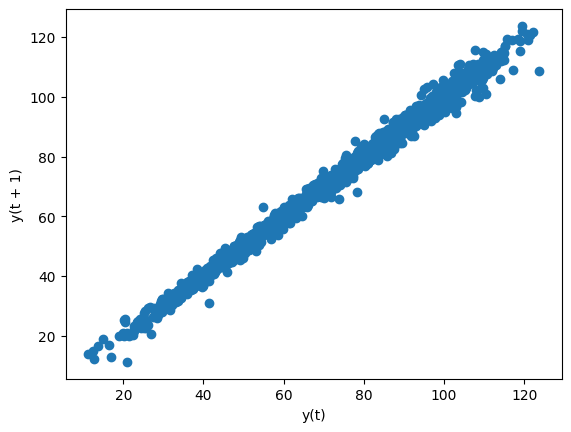

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df['price'])
plt.show()

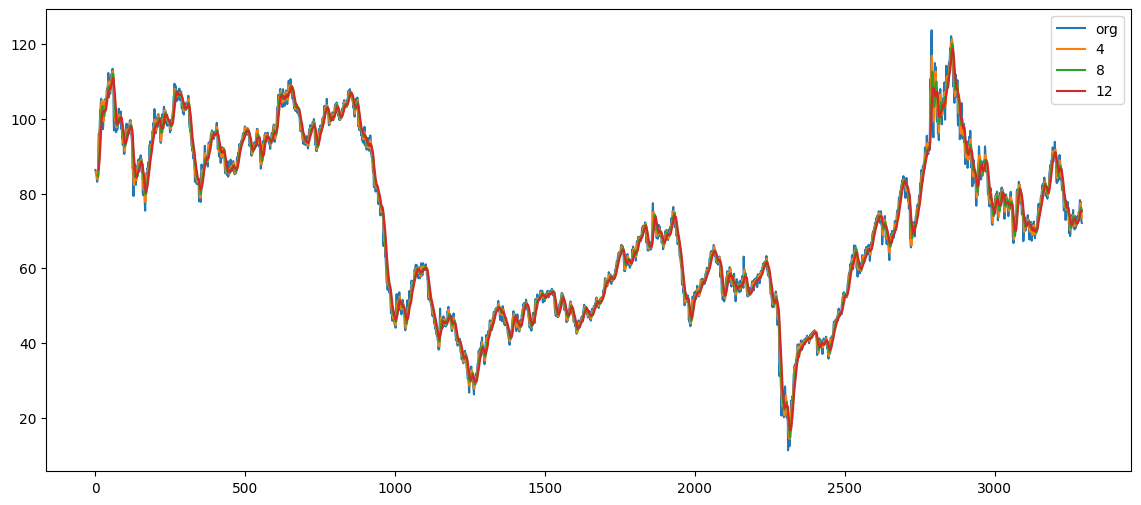

In [ ]:
#Moving Average
plt.figure(figsize=(14,6))
df.price.plot(label="org")
for i in range(4,13,4):
    df["price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

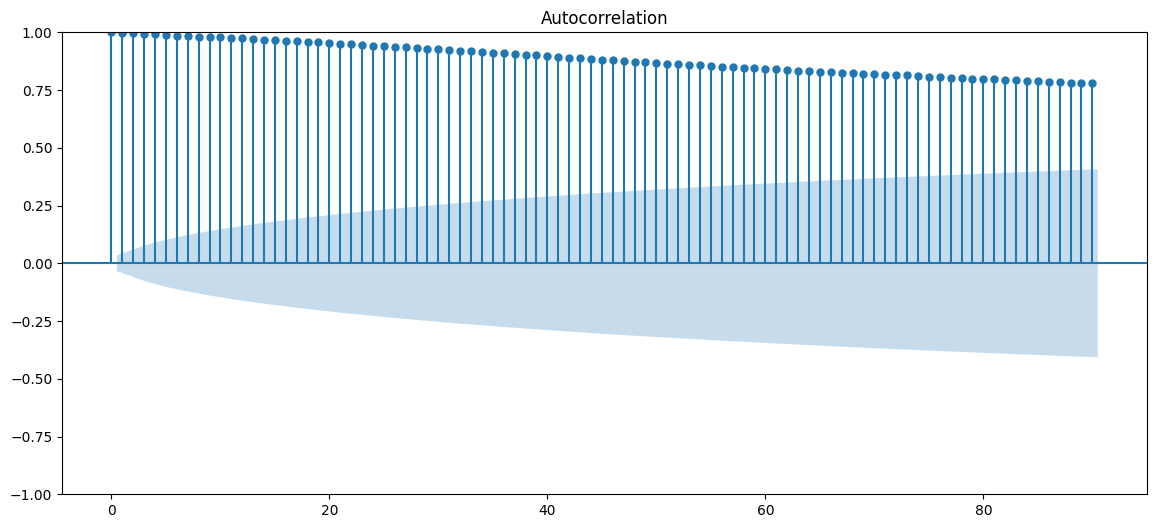

In [ ]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(df.price, lags=90)
    plt.show()

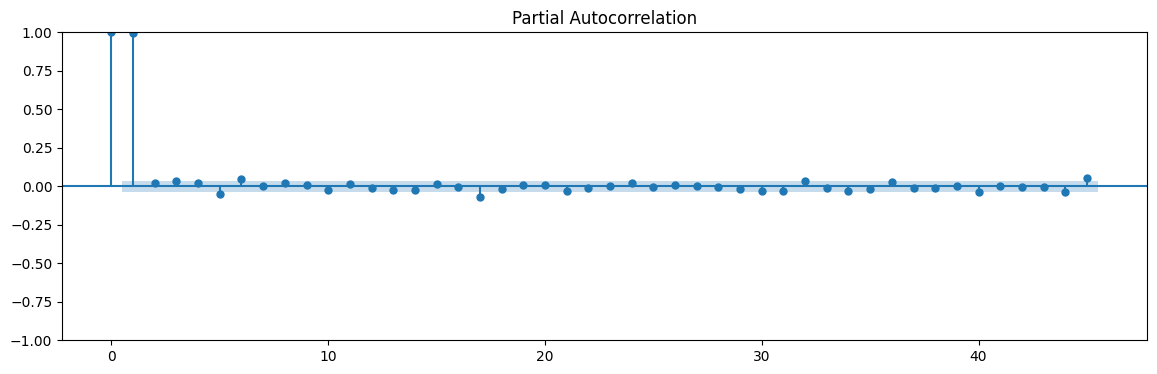

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(df.price,lags=45)
    plt.show()

In [ ]:
from google.colab import files
upload=files.upload()

Saving EuropeanBrent.csv to EuropeanBrent.csv


In [ ]:
df1 = pd.read_csv('EuropeanBrent.csv') # Loading Dataset

In [ ]:
df1

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63
...,...,...
9077,"Feb 22, 2023",79.55
9078,"Feb 23, 2023",82.08
9079,"Feb 24, 2023",82.31
9080,"Feb 27, 2023",82.31


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9082 entries, 0 to 9081
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Date                                              9081 non-null   object 
 1   Europe Brent Spot Price FOB (Dollars per Barrel)  9081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 142.0+ KB


In [ ]:
df1.isnull().sum()

Date                                                1
Europe Brent Spot Price FOB (Dollars per Barrel)    1
dtype: int64

In [ ]:
df1=df1.dropna()

In [ ]:
df1.isnull().sum()

Date                                                0
Europe Brent Spot Price FOB (Dollars per Barrel)    0
dtype: int64

In [ ]:
df1['Date']=pd.to_datetime(df1['Date'])

<ipython-input-38-eb5a27a1d712>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1['Date'])


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9080
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              9081 non-null   datetime64[ns]
 1   Europe Brent Spot Price FOB (Dollars per Barrel)  9081 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 212.8 KB


In [ ]:
df1.rename(columns={'Europe Brent Spot Price FOB (Dollars per Barrel)':'price'},inplace=True)
df1

<ipython-input-40-a4473062e8c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Europe Brent Spot Price FOB (Dollars per Barrel)':'price'},inplace=True)


,Date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9076,2023-02-21,82.14
9077,2023-02-22,79.55
9078,2023-02-23,82.08
9079,2023-02-24,82.31


<Axes: xlabel='Date', ylabel='price'>

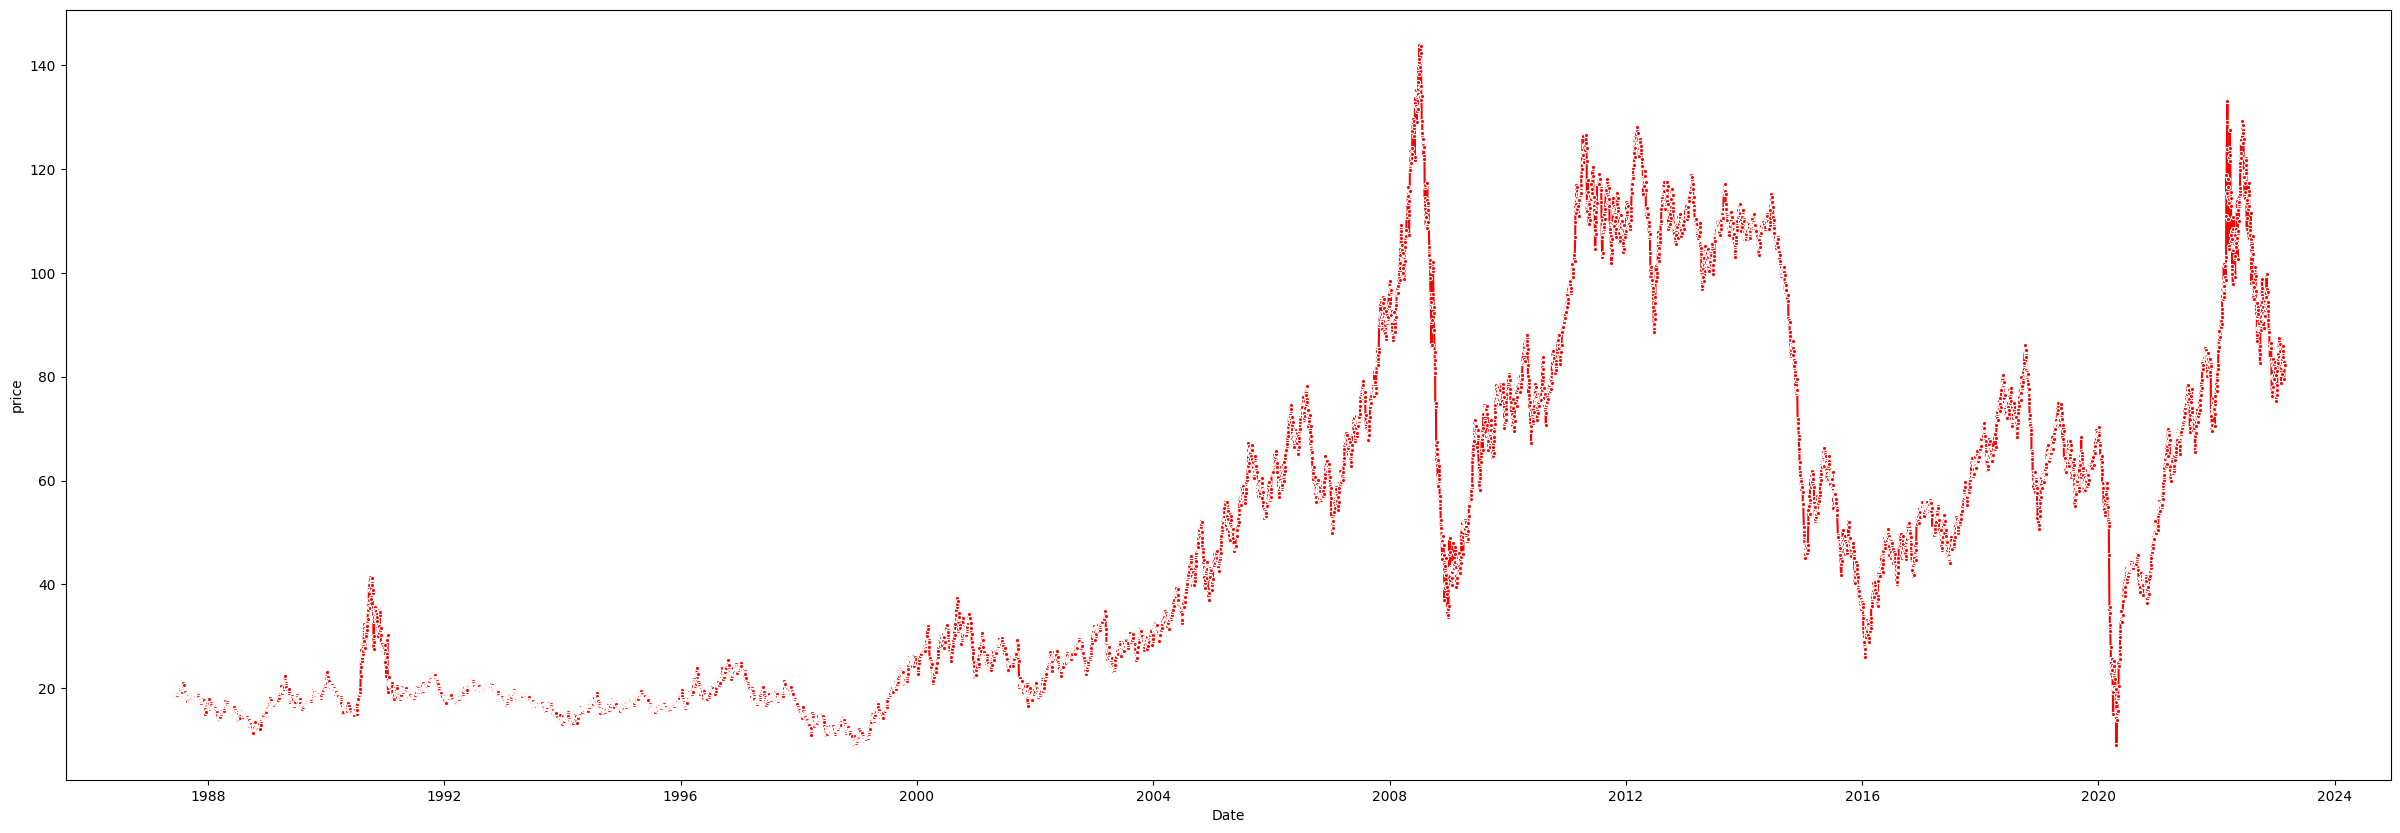

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.lineplot(data=df1,x ="Date",y ="price",color = "red",marker = ".")

<Axes: ylabel='price'>

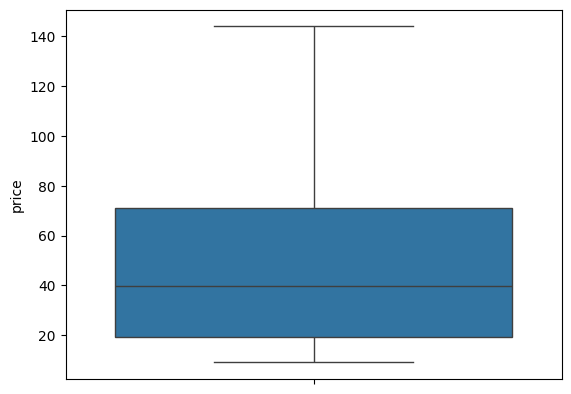

In [ ]:
sns.boxplot(data=df1['price'])

In [ ]:
Price_bw_2011_2015=df['price'][(df['date']>'2011-02-01') & (df['date']<'2015-03-01')].mean()
print('Mean Price between 2011 & 2015=',round(Price_bw_2011_2015,2))
Price_bw_2015_2020=df['price'][(df['date']>'2015-03-01') & (df['date']<'2020-03-01')].mean()
print('Mean Price between 2015 & 2020=',round(Price_bw_2015_2020,2))
dev=(Price_bw_2015_2020/Price_bw_2011_2015)-1
print('%Deviation between price of both periods=',round(dev*100,2),'%')

Mean Price between 2011 & 2015= 93.33
Mean Price between 2015 & 2020= 52.91
%Deviation between price of both periods= -43.31 %


**Observations same as macrotrends data for period 2011 to 2024, Lets see observation before this period**

In [ ]:
df1[df1['price']>140]

,Date,price
5371,2008-07-01,140.67
5372,2008-07-02,141.24
5373,2008-07-03,143.95
5378,2008-07-11,143.68
5379,2008-07-14,142.43


In [ ]:
Price_before_2004=df1['price'][df1['Date']<'2004-03-01'].mean()
print('Mean Price before 2004=',round(Price_before_2004,2))
Price_bw_2004_2008=df1['price'][(df1['Date']>'2004-03-01') & (df1['Date']<'2008-08-01')].mean()
print('Mean Price between 2004 & 2008=',round(Price_bw_2004_2008,2))
dev=(Price_bw_2004_2008/Price_before_2004)-1
print('%Deviation between price of both periods=',round(dev*100,2),'%')

Mean Price before 2004= 20.28
Mean Price between 2004 & 2008= 65.62
%Deviation between price of both periods= 223.55 %


From 2004 to 2008 oil prices continued to rise due to rising in demand & not meeting the demand by suppliers. in This period worlds dependency was only on OPECs (organization of petrolium exporting countries). Majorly Due to lack of technology OPECs were not able to meet the demand. Other reasons were political issues which lowered oil production & severe storm which damaged infrastructure & supply of oil in OPEC countries.

In [ ]:
Least_Price_bw_2008_2011=df1['price'][(df1['Date']>'2008-08-01') & (df1['Date']<'2011-02-01')].min()
print('Least_Price_bw_2008_2011=',round(Least_Price_bw_2008_2011,2))
df1[df1['price']==Least_Price_bw_2008_2011]

Least_Price_bw_2008_2011= 33.73


,Date,price
879,1990-10-26,33.73
5495,2008-12-26,33.73


After reaching peak in Jul-2008, oil prices again when to lowest peak of 33.73 USD/barrel due to U.S. started producing shale gas(Shale gas refers to natural gas that is trapped within shale formations. Shales are fine-grained sedimentary rocks that can be rich resources of petroleum and natural gas). Due to the production America stopped importing petroleum from the OPEC (Organization of the Petroleum Exporting Countries), this increased the supply by approximately 40% and demand being the same the prices started to drop.

In [ ]:
Price_bw_2009_2011=df1['price'][(df1['Date']>'2009-01-15') & (df1['Date']<'2011-02-01')].mean()
print('Mean Price between 2004 & 2008=',round(Price_bw_2009_2011,2))

Mean Price between 2004 & 2008= 72.2


Post Dec 2008, oil prices continued to increase till 2011 purely due to increase in demand.

In [ ]:
df2=df1.set_index('Date').resample('M').mean()
df2

,price
Date,
1987-05-31,18.580000
1987-06-30,18.860476
1987-07-31,19.856522
1987-08-31,18.979524
1987-09-30,18.313182
...,...
2022-10-31,93.331905
2022-11-30,91.415455
2022-12-31,80.924000


<Axes: xlabel='Date', ylabel='price'>

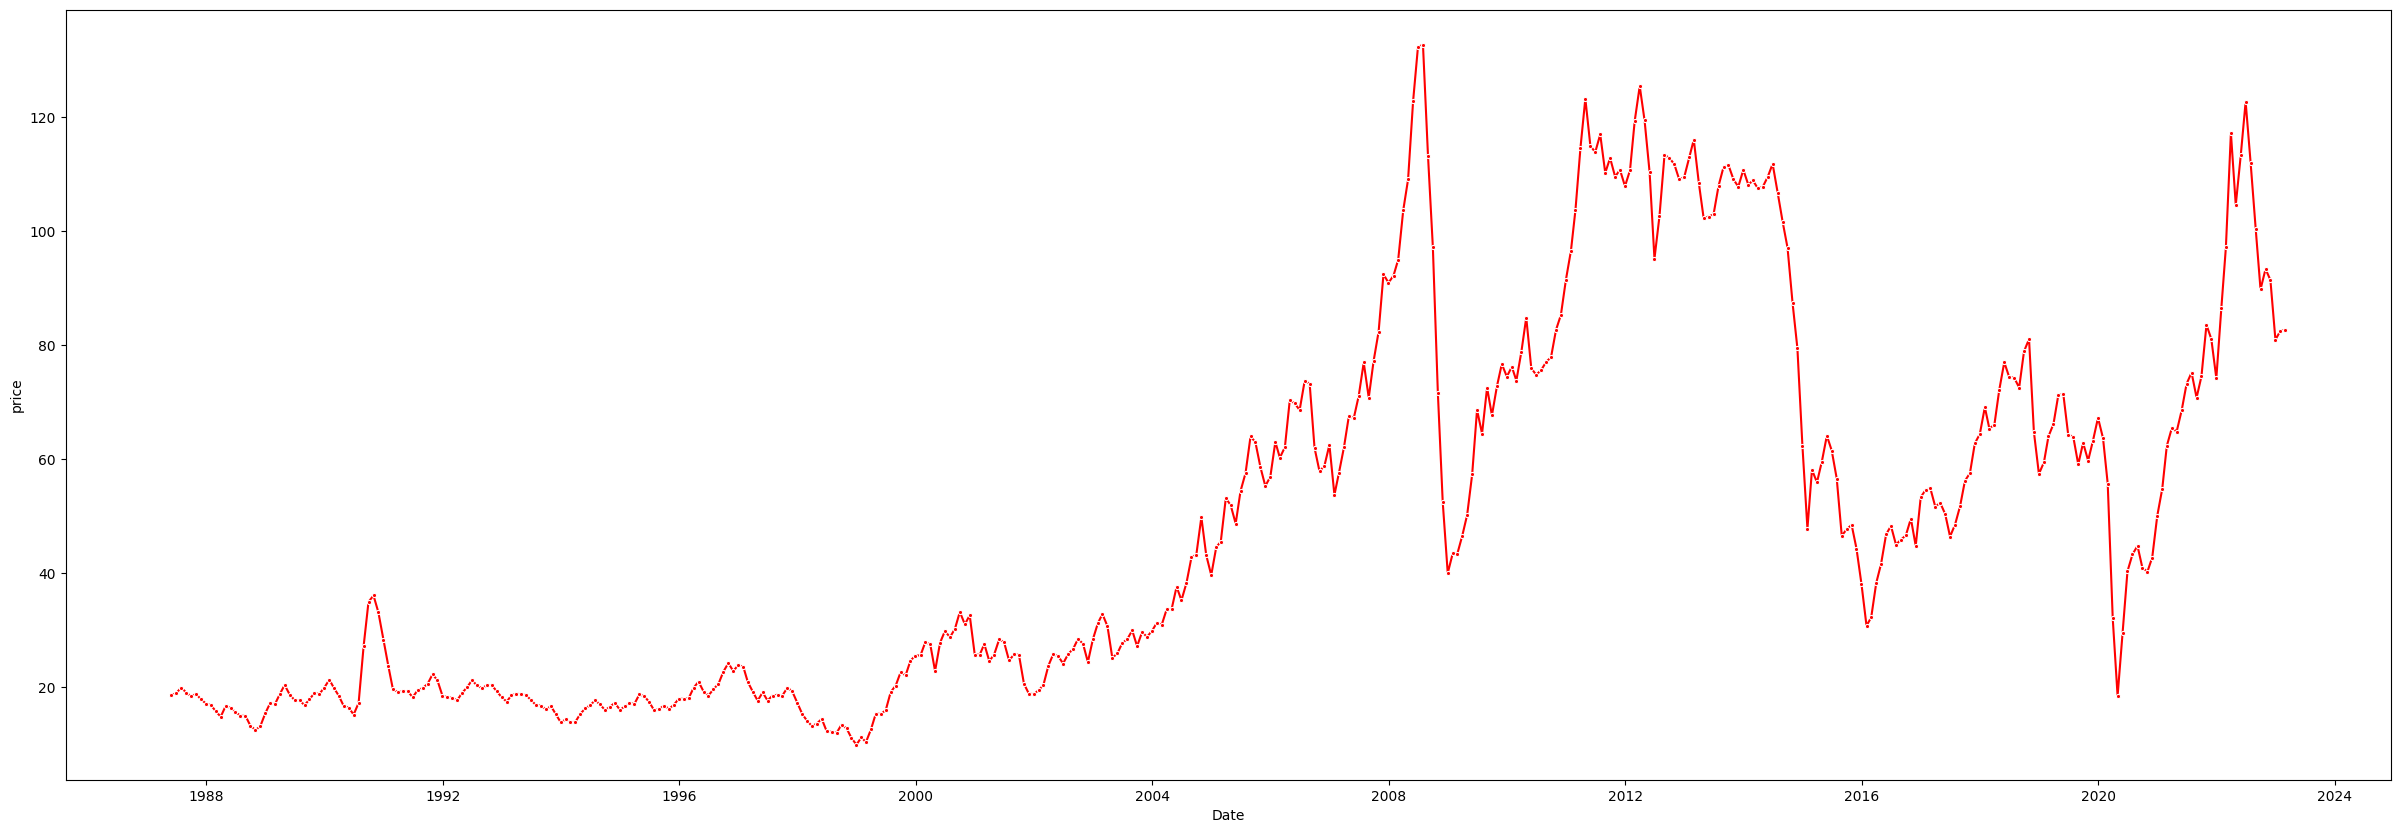

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.lineplot(data=df2,x ="Date",y ="price",color = "red",marker = ".")

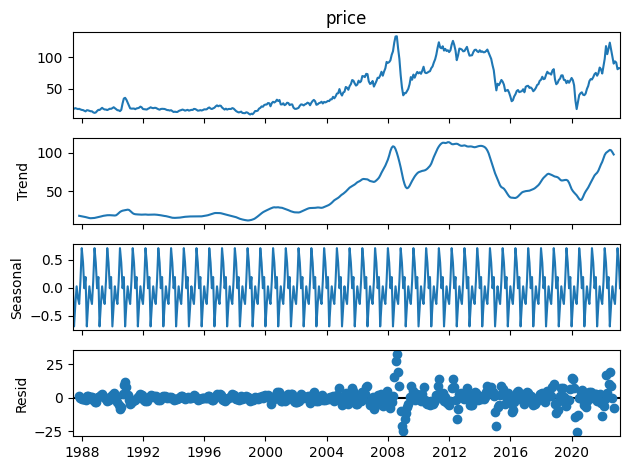

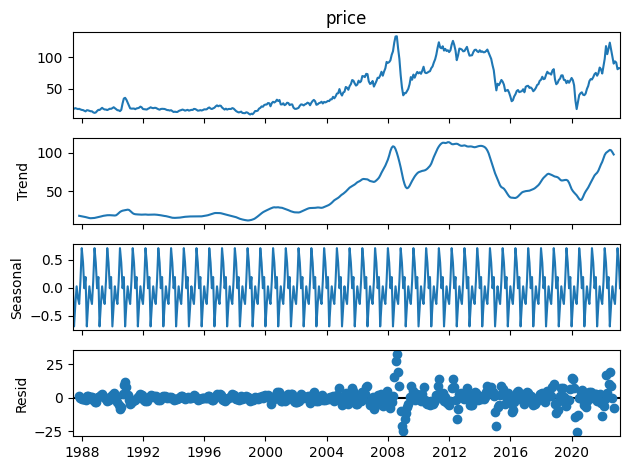

In [ ]:
seasonal_ts_add=smf.tsa.seasonal_decompose(df2["price"],period=10)
seasonal_ts_add.plot()

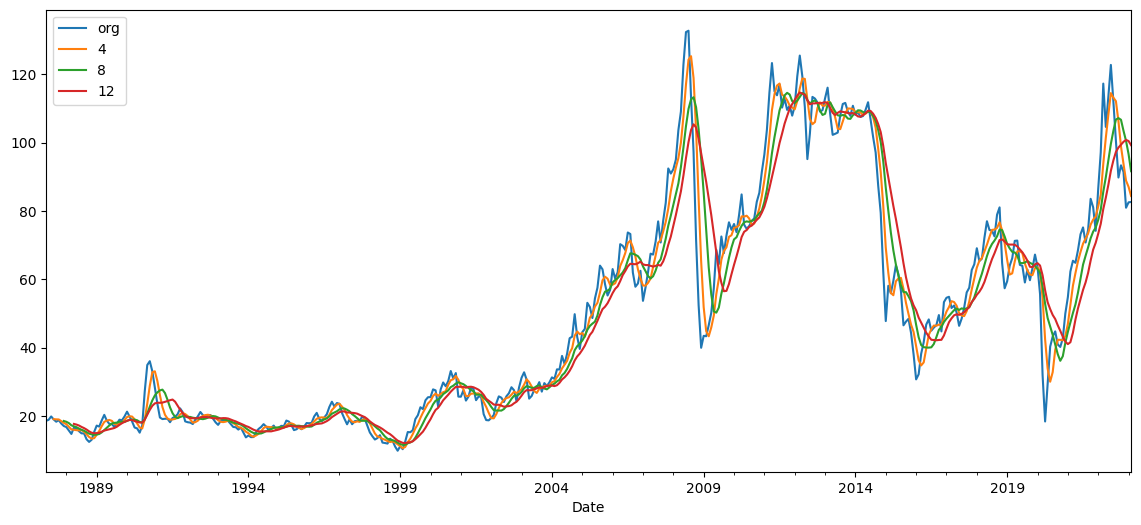

In [ ]:
#Moving Average
plt.figure(figsize=(14,6))
df2.price.plot(label="org")
for i in range(4,13,4):
    df2["price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

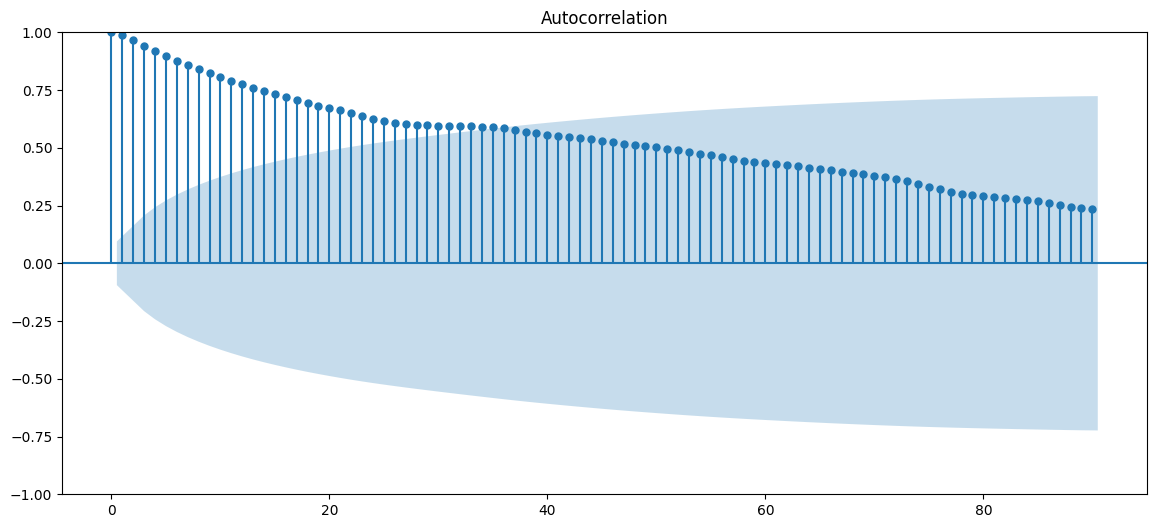

In [ ]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(df2.price, lags=90)
    plt.show()

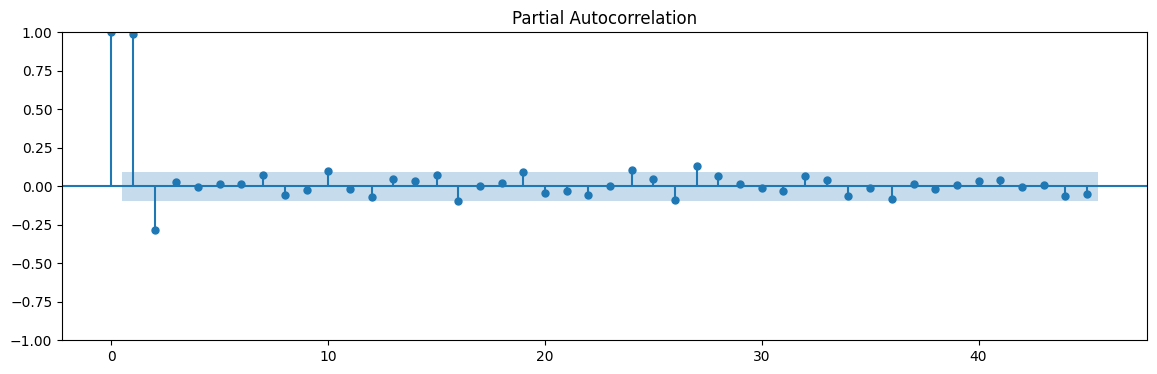

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(df2.price,lags=45)
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from math import sqrt
from pandas import datetime
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

<ipython-input-54-7d400dd89167>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
#Splitting Train and Test Data
#95% data as train & 5% as Test
train_data = df2[:406]
test_data = df2[406:]
train_data.head()

,price
Date,
1987-05-31,18.580000
1987-06-30,18.860476
1987-07-31,19.856522
1987-08-31,18.979524
1987-09-30,18.313182


In [ ]:
test_data.head()

,price
Date,
2021-03-31,65.410000
2021-04-30,64.806500
2021-05-31,68.534211
2021-06-30,73.164091
2021-07-31,75.165909


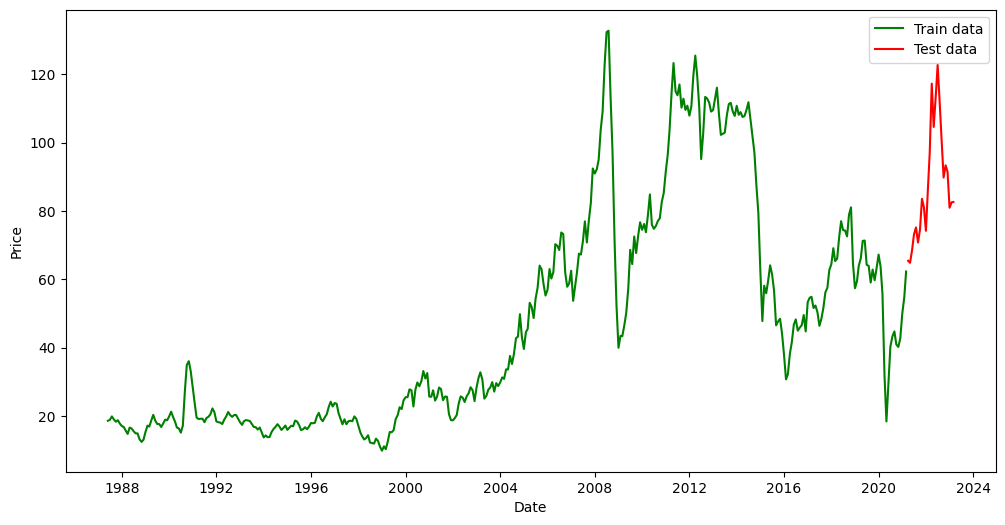

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

In [ ]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
#Exponential Methods
#Simple Exponential Method
#Using Forecast Attribute
ses_model = SimpleExpSmoothing(train_data['price']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.price))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.price)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = ', mape_ses,"\n",\
'Train Root Mean Squared Error = ',train_rmse_ses,"\n",
'Test Root Mean Squared Error  = ',test_rmse_ses)

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   =  26.61243055491525 
 Train Root Mean Squared Error =  4.75495858292724 
 Test Root Mean Squared Error  =  30.30416143101444


In [ ]:
#Using Predict Attribute
ses_model = SimpleExpSmoothing(train_data['price']).fit(optimized=True)
test_pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.price))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.price)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 26.61243055491525 
 Train Root Mean Squared Error = 4.75495858292724 
 Test Root Mean Squared Error  = 30.30416143101444


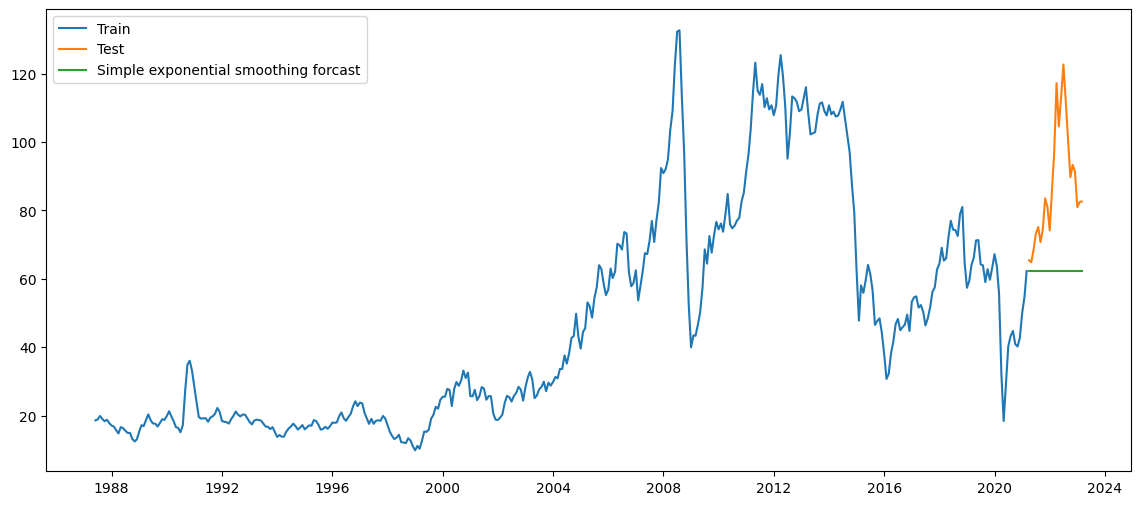

In [ ]:
#Difference between Predict and Forecast attribute
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

No seasonality captured. Most recent observation gets higher weightages than the older ones for forecasting.

In [ ]:
#Holt method (Double Exponential)
#Captures both Level and Trend .
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.price))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.price)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 22.735249166936953 
 Train Root Mean Squared Error = 4.75688180252876 
 Test Root Mean Squared Error  = 26.86314458468191


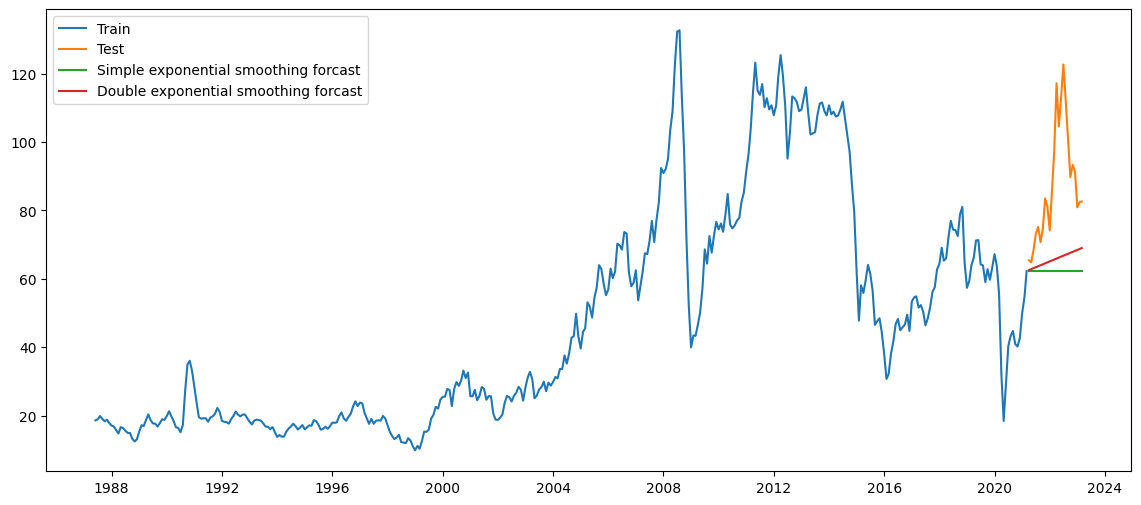

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

Observation We can see that we are able to capture the trend of the data but the level is on another level. We were not able to capture the seasonality.

In [ ]:
#Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(24)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.price))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.price)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_texp))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error   = 23.75662041834156 
 Train Root Mean Squared Error = 4.697601514213313 
 Test Root Mean Squared Error  = 27.895854715832655


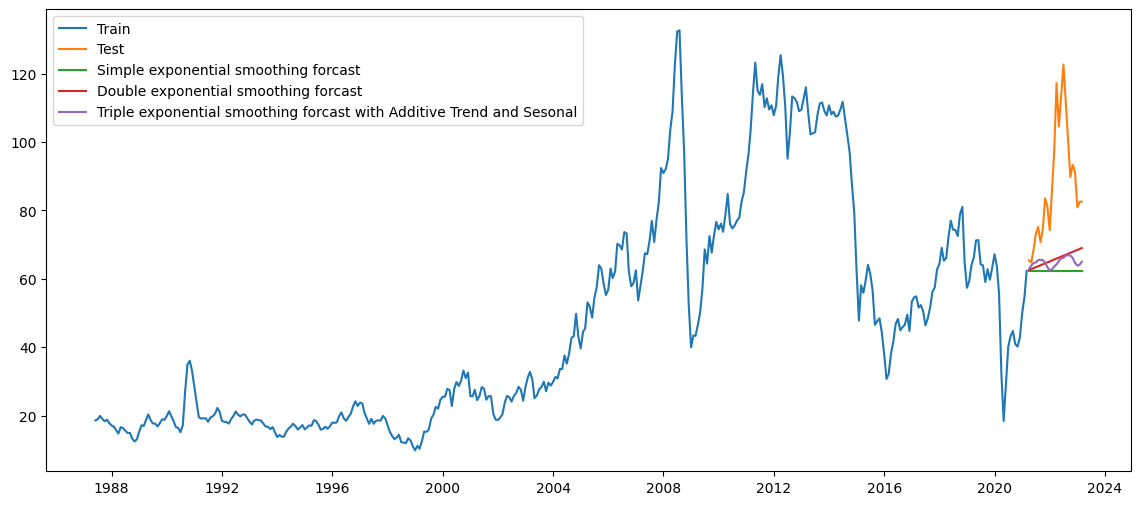

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

It captures the trend, which we can see that the forecasted values are between simple & double exponential
It also captures the seasonality. But the errors are higher.

In [ ]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)
texp_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(24)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.price))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.price)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error   = 23.738983710646412 
 Train Root Mean Squared Error = 4.642345663483381 
 Test Root Mean Squared Error  = 27.735799655706064


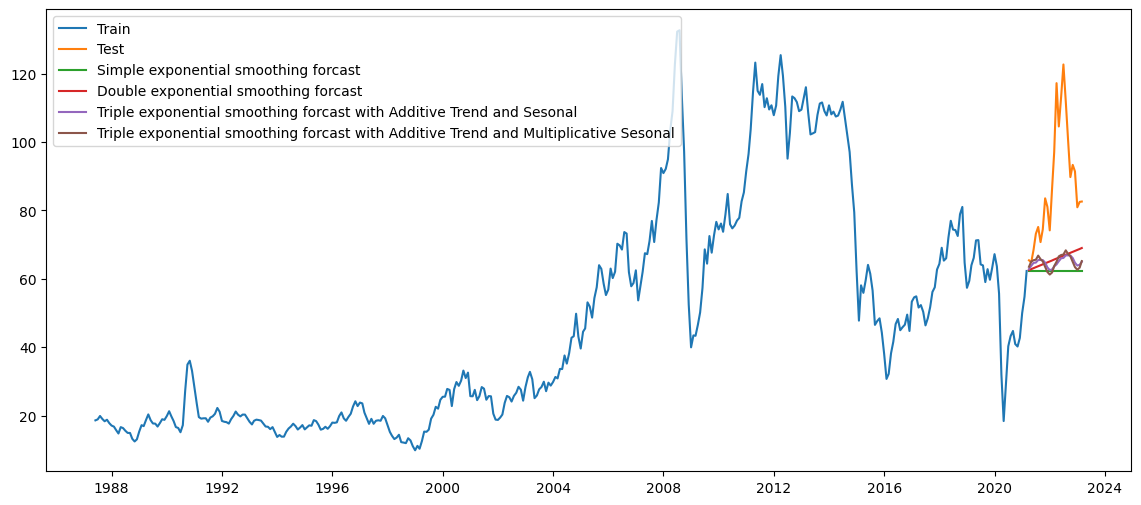

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

We can see that the trend & error are similar to previous one.

In [ ]:
#Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)
texp_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.price))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.price)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error   = 25.949924404016432 
 Train Root Mean Squared Error = 13.289795105170315 
 Test Root Mean Squared Error  = 24.860991794218645


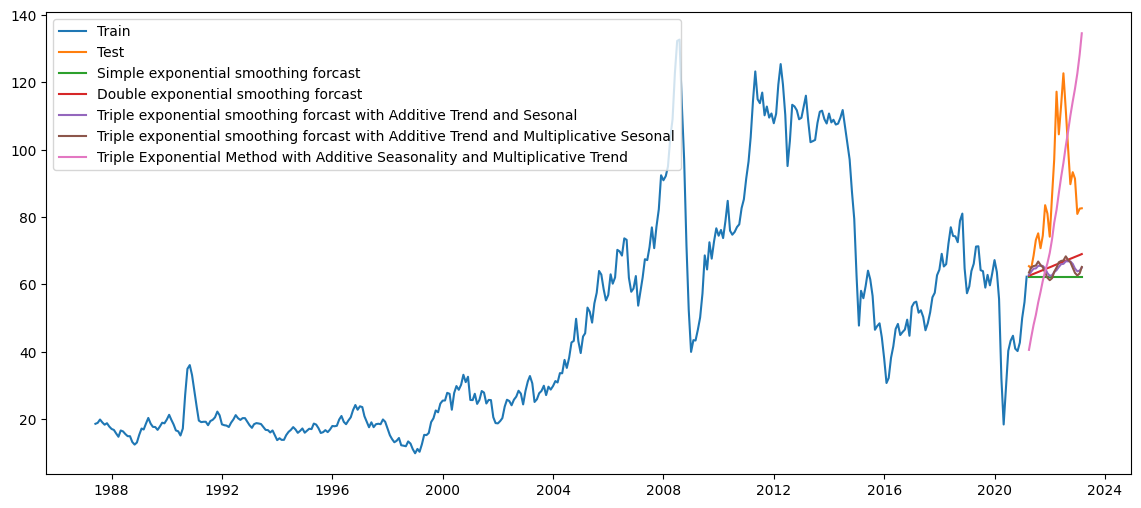

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

With Additive seasonality & multiplicalive trend the error have been increased drastically as it is following most recent trend.

In [ ]:
#Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(24)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.price))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.price)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = 27.072330589637545 
 Train Root Mean Squared Error = 4.642622431803363 
 Test Root Mean Squared Error  = 30.848278092063076


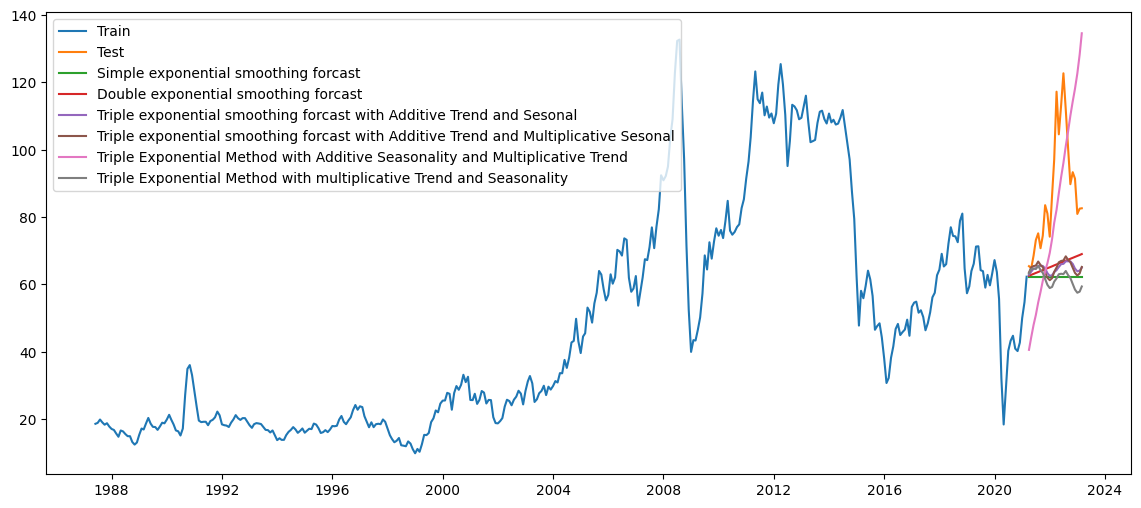

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

With Multiplicative seasnoality & trend we are able to capture seasonality but still it has huge error & trend is approximately following simple linear regression.

In [ ]:
#Comparing the results
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE_Values
0,Double_Exp,4.756882,22.735249,26.863145
1,Triple_Exp_Mul_Add,4.642346,23.738984,27.735800
2,Triple_Exp_Add,4.697602,23.756620,27.895855
3,Triple_Exp_Add_Mul,13.289795,25.949924,24.860992
4,Simple_Exp,4.754959,26.612431,30.304161
5,Triple_Exp_Mul,4.642622,27.072331,30.848278


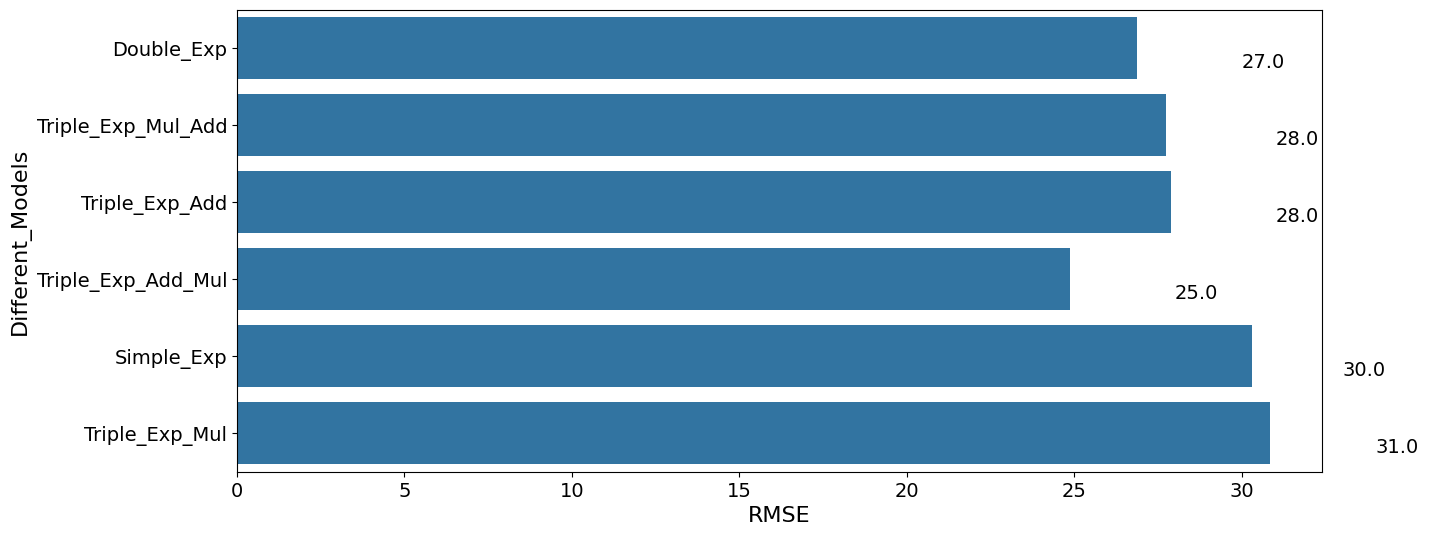

In [ ]:
#Visualizing Models Performance
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('RMSE', size=16)
axe.set_ylabel('Different_Models', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)
plt.show()

In [ ]:
#Autoregressive Integrated Moving Averages (ARIMA)
#Stationary vs Non-stationary Time Series
#Test of Stationarity
#As we have quarterly data the window size for moving average is equal to 4
def test_stationarity(timeseries):

    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

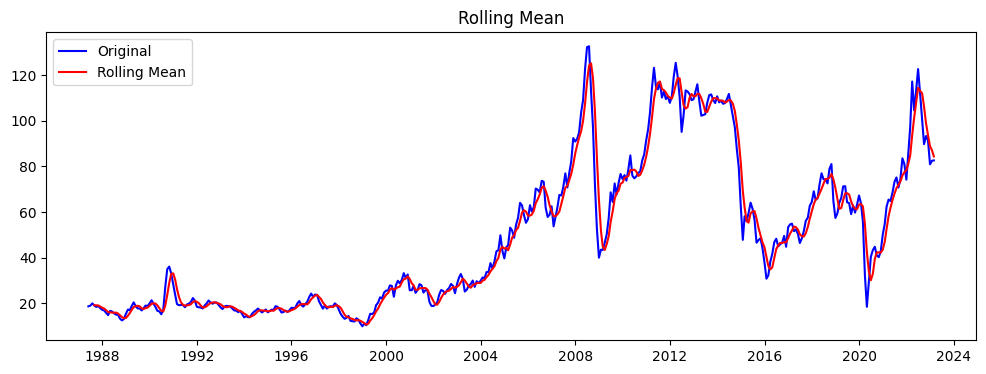

Results of Dickey Fuller Test:
Test Statistic                  -1.650004
p-value                          0.457038
#Lags Used                       6.000000
Number of Observations Used    423.000000
Critical Value (1%)             -3.445904
Critical Value (5%)             -2.868397
Critical Value (10%)            -2.570423
dtype: float64


In [ ]:
#Augmented Dicky Fuller Test
plt.figure(figsize=(12,4))
price= pd.DataFrame()
price['price'] = df2[['price']]
test_stationarity(price)

In [ ]:
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
adf_test(price.price)

Fail to reject the null hypothesis
Data is non-stationary


,price
Date,
1987-05-31,2.922086
1987-06-30,2.937069
1987-07-31,2.988533
1987-08-31,2.943361
1987-09-30,2.907621


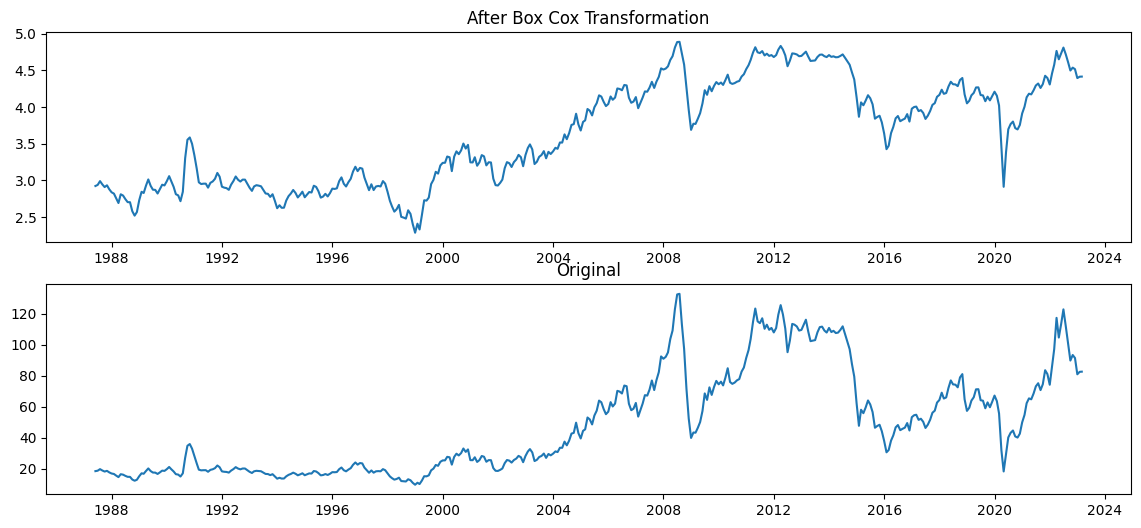

In [ ]:
#Box Cox Transformation
data_boxcox = pd.DataFrame()
data_boxcox['price'] = pd.Series(boxcox(df2['price'], lmbda=0), df2.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(df2, label='original')
axis[1].set_title('Original')
plt.show()

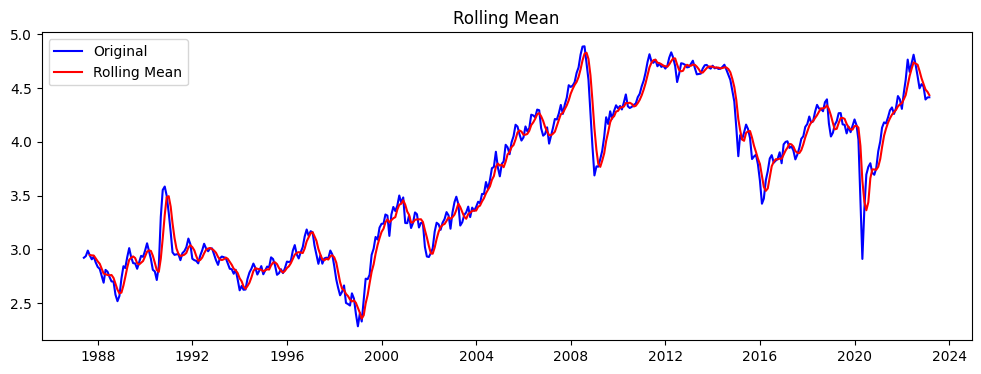

Results of Dickey Fuller Test:
Test Statistic                  -1.474833
p-value                          0.545923
#Lags Used                       4.000000
Number of Observations Used    425.000000
Critical Value (1%)             -3.445831
Critical Value (5%)             -2.868365
Critical Value (10%)            -2.570405
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox)

In [ ]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


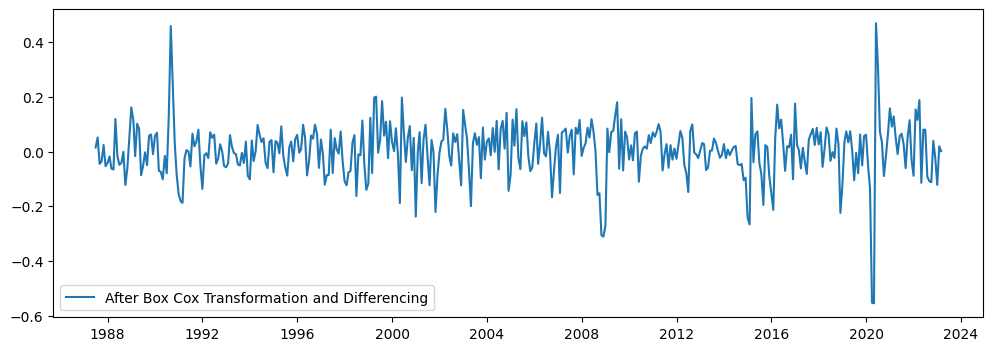

In [ ]:
#Differencing of the Box-Cox Transformation
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

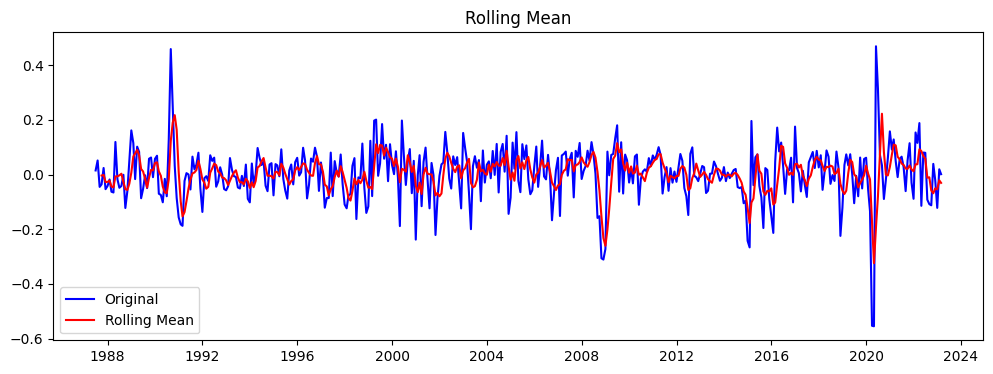

Results of Dickey Fuller Test:
Test Statistic                -1.145432e+01
p-value                        5.755918e-21
#Lags Used                     3.000000e+00
Number of Observations Used    4.250000e+02
Critical Value (1%)           -3.445831e+00
Critical Value (5%)           -2.868365e+00
Critical Value (10%)          -2.570405e+00
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)

In [ ]:
adf_test(data_boxcox_diff.price)

Reject the null hypothesis
Data is stationary


In [ ]:
#Building The Time Series Forecasting with Optimal Value using ARIMA
train_data_boxcox = data_boxcox[:406]
test_data_boxcox = data_boxcox[406:]
train_data_boxcox_diff = data_boxcox_diff[:406]
test_data_boxcox_diff = data_boxcox_diff[406:]

In [ ]:
#ARIMA Hyperparameter Tuning
# Grid search ARIMA parameters for a time series
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.944)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
#Evaluate parameters
#p_values = range(0,5)
#d_values = range(0,5)
#q_values = range(0,5)
#evaluate_models(train_data_boxcox_diff.price, p_values, d_values, q_values)

In [ ]:
#Inverse transformation of the Box-Cox Differencing
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit1 = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit1.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.price[0])

# Now doing the reverse transformation
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

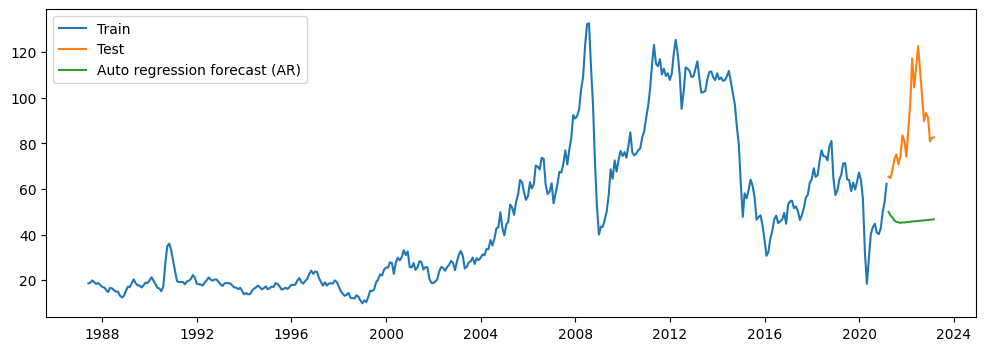

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train_data['price'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

In [ ]:
#Model Evaluation
#RMSE (Root Mean Squared Error)
rmse_arima = np.sqrt(mean_squared_error(test_data.price, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

44.8

In [ ]:
#MAPE (Mean Absolute Percent Error)
mape_arima = round(np.mean(np.abs((test_data.price - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.price)*100),2)
mape_arima

45.43

In [ ]:
#Analysing the Residuals
#The mean of the Residual should be zero or close to Zero
model_residual = model_fit1.resid
model_residual.mean()

0.0006643728913994655

In [ ]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


In [ ]:
#Seasonal Auto Regressive Integrated Moving Average (SARIMA)
#We are only passing the Box Cox because the ARIMAX will perform the differencing internally
#seasonal_order P=2, Q=2, D=2 and m=12 || m=12 . Because the seasonality is monthly.
model = SARIMAX(train_data_boxcox, order=(4,1,4), seasonal_order=(4,1,4,12))
model_fit2= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

In [ ]:
#Inverse Transformation of the Differencing Box-Cox Transformation
y_hat_sarima['sarima_forecast_boxcox'] = model_fit2.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

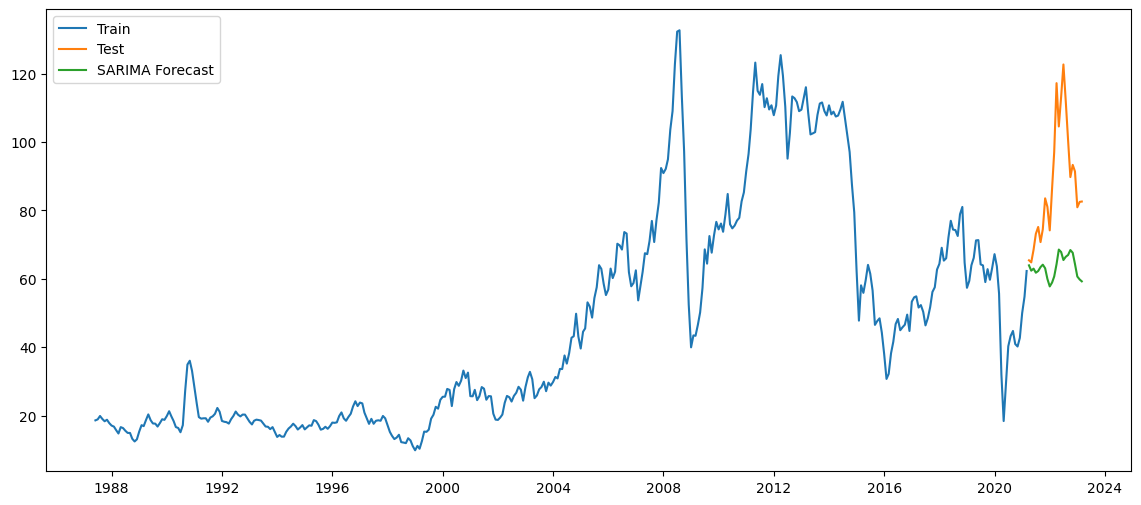

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data['price'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse_sarima = np.sqrt(mean_squared_error(test_data, y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
rmse_sarima

28.63

In [ ]:
mape_sarima = round(np.mean(np.abs((test_data.price - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data.price)*100),2)
mape_sarima

25.64

In [ ]:
model_residual = model_fit2.resid
model_residual.mean()

0.0045066141083912915

In [ ]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


In [ ]:
#Comparing the results
Evaluation = {"Models":pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exp_Additive","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Multiplicative","ARIMA","SARIMA"]),
        "MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp,mape_arima,mape_sarima]),\
        "RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp,rmse_arima,rmse_sarima])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

,Models,MAPE(%),RMSE_Values
0,Triple_Exp_Add_Mul,25.949924,24.860992
1,Double_Exponential,22.735249,26.863145
2,Triple_Exp_Mul_Add,23.738984,27.735800
3,Triple_Exp_Additive,23.756620,27.895855
4,SARIMA,25.640000,28.630000
5,Simple_Exponential,26.612431,30.304161
6,Triple_Exp_Multiplicative,27.072331,30.848278
7,ARIMA,45.430000,44.800000


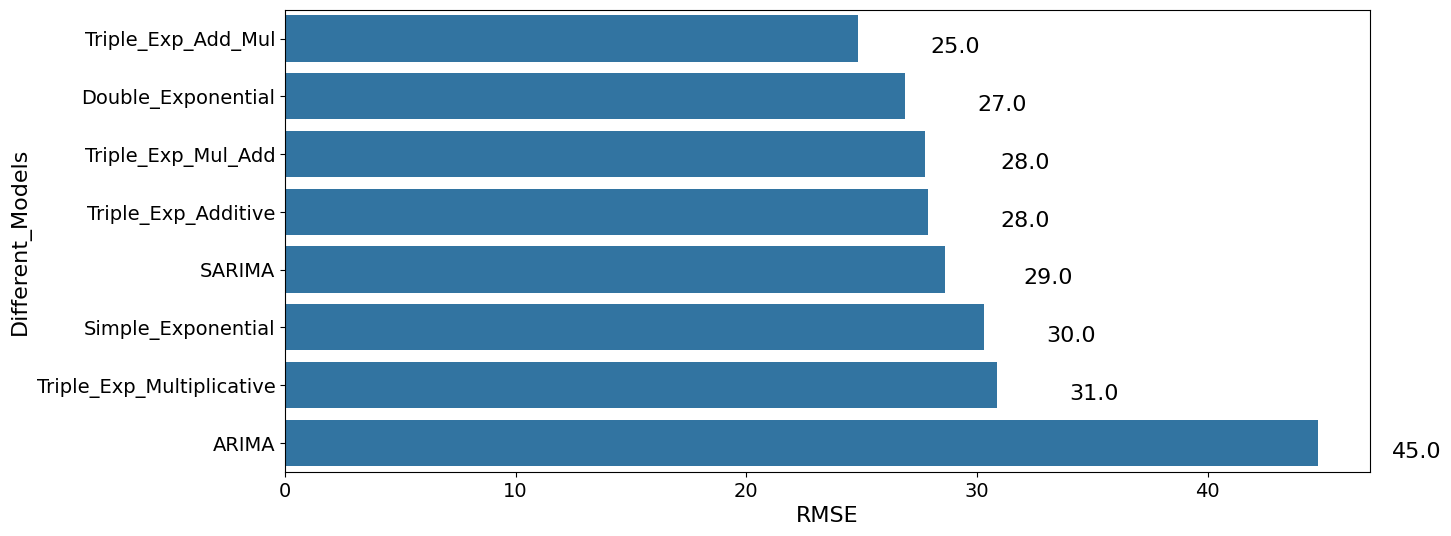

In [ ]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('RMSE', size=16)
axe.set_ylabel('Different_Models', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 16)

plt.show()

Sequence Classification with LSTM Recurrent Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
tf.random.set_seed(7)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df2)
#dataset=np.array(df2['price'])
dataset

array([[0.07124613],
       [0.07352839],
       [0.08163331],
       [0.07449709],
       [0.069075  ],
       [0.07269231],
       [0.0647442 ],
       [0.05882965],
       [0.05635071],
       [0.04805152],
       [0.0399289 ],
       [0.05509612],
       [0.0528082 ],
       [0.04653893],
       [0.04136359],
       [0.04125207],
       [0.02730209],
       [0.02100534],
       [0.02604084],
       [0.04461069],
       [0.05978832],
       [0.05748222],
       [0.07223033],
       [0.08540061],
       [0.07167887],
       [0.06384876],
       [0.06345776],
       [0.05651798],
       [0.06462408],
       [0.07391288],
       [0.0724445 ],
       [0.08149031],
       [0.09298698],
       [0.08128324],
       [0.06967789],
       [0.05523317],
       [0.05311889],
       [0.04296777],
       [0.05976542],
       [0.1411226 ],
       [0.20403547],
       [0.21317839],
       [0.18913052],
       [0.15012311],
       [0.11182067],
       [0.0790252 ],
       [0.07533502],
       [0.076

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.944)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

405 25


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)

In [ ]:
print(create_dataset(dataset))

(array([[0.07124613],
       [0.07352839],
       [0.08163331],
       [0.07449709],
       [0.069075  ],
       [0.07269231],
       [0.0647442 ],
       [0.05882965],
       [0.05635071],
       [0.04805152],
       [0.0399289 ],
       [0.05509612],
       [0.0528082 ],
       [0.04653893],
       [0.04136359],
       [0.04125207],
       [0.02730209],
       [0.02100534],
       [0.02604084],
       [0.04461069],
       [0.05978832],
       [0.05748222],
       [0.07223033],
       [0.08540061],
       [0.07167887],
       [0.06384876],
       [0.06345776],
       [0.05651798],
       [0.06462408],
       [0.07391288],
       [0.0724445 ],
       [0.08149031],
       [0.09298698],
       [0.08128324],
       [0.06967789],
       [0.05523317],
       [0.05311889],
       [0.04296777],
       [0.05976542],
       [0.1411226 ],
       [0.20403547],
       [0.21317839],
       [0.18913052],
       [0.15012311],
       [0.11182067],
       [0.0790252 ],
       [0.07533502],
       [0.07

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
403/403 - 3s - loss: 0.0518 - 3s/epoch - 8ms/step
Epoch 2/100
403/403 - 1s - loss: 0.0183 - 730ms/epoch - 2ms/step
Epoch 3/100
403/403 - 1s - loss: 0.0049 - 676ms/epoch - 2ms/step
Epoch 4/100
403/403 - 1s - loss: 0.0017 - 660ms/epoch - 2ms/step
Epoch 5/100
403/403 - 1s - loss: 0.0016 - 693ms/epoch - 2ms/step
Epoch 6/100
403/403 - 1s - loss: 0.0016 - 674ms/epoch - 2ms/step
Epoch 7/100
403/403 - 1s - loss: 0.0016 - 672ms/epoch - 2ms/step
Epoch 8/100
403/403 - 1s - loss: 0.0015 - 690ms/epoch - 2ms/step
Epoch 9/100
403/403 - 1s - loss: 0.0015 - 670ms/epoch - 2ms/step
Epoch 10/100
403/403 - 1s - loss: 0.0015 - 656ms/epoch - 2ms/step
Epoch 11/100
403/403 - 1s - loss: 0.0016 - 682ms/epoch - 2ms/step
Epoch 12/100
403/403 - 1s - loss: 0.0016 - 685ms/epoch - 2ms/step
Epoch 13/100
403/403 - 1s - loss: 0.0015 - 660ms/epoch - 2ms/step
Epoch 14/100
403/403 - 1s - loss: 0.0016 - 666ms/epoch - 2ms/step
Epoch 15/100
403/403 - 1s - loss: 0.0015 - 960ms/epoch - 2ms/step
Epoch 16/100
403/403 -

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 36ms/step
Train Score: 4.80 RMSE
Test Score: 8.24 RMSE


In [ ]:
trainPredict

array([[ 19.698843 ],
       [ 19.958298 ],
       [ 20.883238 ],
       [ 20.068556 ],
       [ 19.452436 ],
       [ 19.863197 ],
       [ 18.962133 ],
       [ 18.295166 ],
       [ 18.016537 ],
       [ 17.087708 ],
       [ 16.184675 ],
       [ 17.87573  ],
       [ 17.61931  ],
       [ 16.919088 ],
       [ 16.343739 ],
       [ 16.331366 ],
       [ 14.7930155],
       [ 14.10465  ],
       [ 14.654832 ],
       [ 16.704437 ],
       [ 18.403063 ],
       [ 18.14365  ],
       [ 19.810677 ],
       [ 21.315027 ],
       [ 19.748005 ],
       [ 18.860962 ],
       [ 18.816805 ],
       [ 18.035318 ],
       [ 18.948557 ],
       [ 20.00205  ],
       [ 19.835022 ],
       [ 20.86687  ],
       [ 22.188066 ],
       [ 20.843174 ],
       [ 19.52082  ],
       [ 17.891106 ],
       [ 17.654102 ],
       [ 16.521814 ],
       [ 18.400488 ],
       [ 27.830708 ],
       [ 35.439056 ],
       [ 36.563232 ],
       [ 33.61567  ],
       [ 28.90418  ],
       [ 24.375187 ],
       [ 2

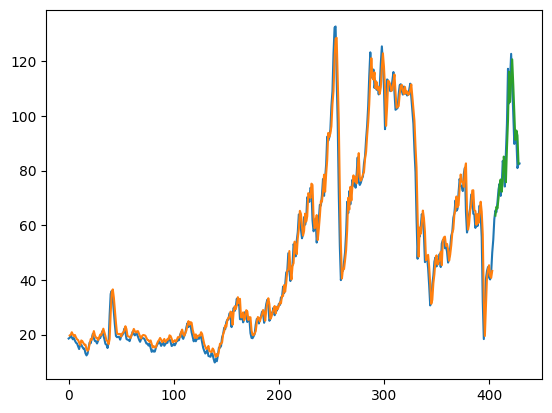

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
test_data

,price
Date,
2021-03-31,65.410000
2021-04-30,64.806500
2021-05-31,68.534211
2021-06-30,73.164091
2021-07-31,75.165909
2021-08-31,70.747143
2021-09-30,74.488636
2021-10-31,83.538095
2021-11-30,81.050000


In [ ]:
len(test_data)

24

In [ ]:
testPredict

array([[ 63.524822],
       [ 66.76076 ],
       [ 66.13829 ],
       [ 69.9756  ],
       [ 74.7102  ],
       [ 76.74366 ],
       [ 72.2436  ],
       [ 76.05672 ],
       [ 85.13416 ],
       [ 82.66192 ],
       [ 75.73364 ],
       [ 88.05586 ],
       [ 98.246864],
       [116.16677 ],
       [105.104706],
       [112.83988 ],
       [120.689766],
       [111.61894 ],
       [101.33304 ],
       [ 91.2295  ],
       [ 94.65621 ],
       [ 92.821434],
       [ 82.536194]], dtype=float32)

In [ ]:
predited_data=pd.DataFrame(testPredict)

In [ ]:
predited_data

,0
0,63.524822
1,66.760757
2,66.138290
3,69.975601
4,74.710197
5,76.743660
6,72.243599
7,76.056717
8,85.134163
9,82.661919


In [ ]:
predicted_data=[65.410000]
for i in predited_data[0]:
  predicted_data.append(i)
predicted_data

[65.41,
 63.52482223510742,
 66.76075744628906,
 66.13829040527344,
 69.97560119628906,
 74.71019744873047,
 76.74365997314453,
 72.24359893798828,
 76.05671691894531,
 85.13416290283203,
 82.66191864013672,
 75.733642578125,
 88.05586242675781,
 98.24686431884766,
 116.1667709350586,
 105.10470581054688,
 112.83988189697266,
 120.68976593017578,
 111.61894226074219,
 101.33303833007812,
 91.22949981689453,
 94.65621185302734,
 92.8214340209961,
 82.53619384765625]

In [ ]:
Prediction=test_data.copy()

In [ ]:
Prediction['Precited_price']=predicted_data

In [ ]:
Prediction=Prediction.drop(columns=['price'])
Prediction

,Precited_price
Date,
2021-03-31,65.410000
2021-04-30,63.524822
2021-05-31,66.760757
2021-06-30,66.138290
2021-07-31,69.975601
2021-08-31,74.710197
2021-09-30,76.743660
2021-10-31,72.243599
2021-11-30,76.056717


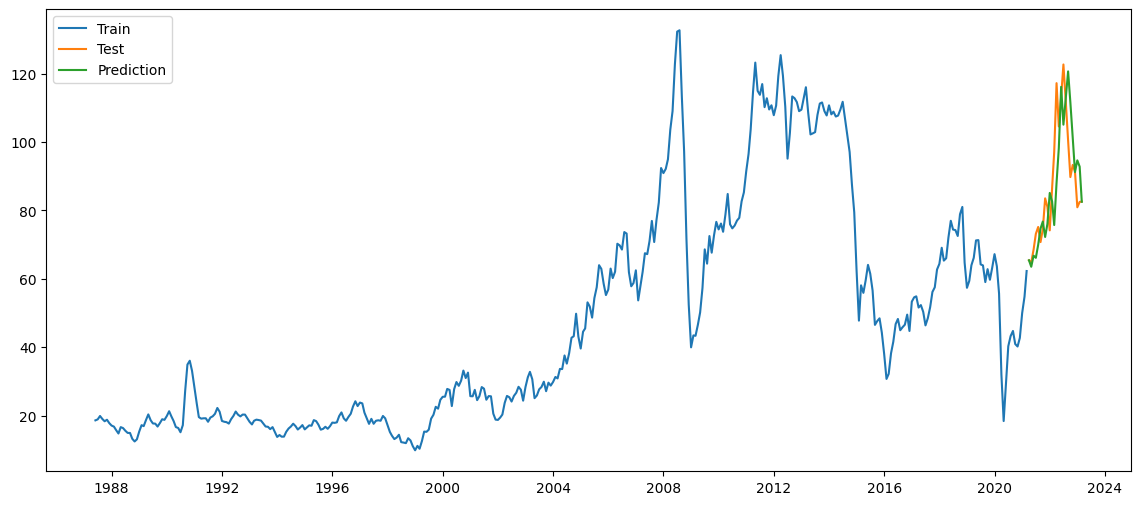

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(Prediction, label='Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
dataX, dataY = create_dataset(dataset, look_back)

In [ ]:
model1 = Sequential()
model1.add(LSTM(4, input_shape=(1, look_back)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(dataX, dataY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
428/428 - 6s - loss: 0.0365 - 6s/epoch - 13ms/step
Epoch 2/100
428/428 - 2s - loss: 0.0109 - 2s/epoch - 4ms/step
Epoch 3/100
428/428 - 1s - loss: 0.0030 - 800ms/epoch - 2ms/step
Epoch 4/100
428/428 - 1s - loss: 0.0017 - 1s/epoch - 2ms/step
Epoch 5/100
428/428 - 1s - loss: 0.0017 - 1s/epoch - 3ms/step
Epoch 6/100
428/428 - 1s - loss: 0.0017 - 1s/epoch - 2ms/step
Epoch 7/100
428/428 - 1s - loss: 0.0017 - 737ms/epoch - 2ms/step
Epoch 8/100
428/428 - 1s - loss: 0.0017 - 746ms/epoch - 2ms/step
Epoch 9/100
428/428 - 1s - loss: 0.0017 - 733ms/epoch - 2ms/step
Epoch 10/100
428/428 - 1s - loss: 0.0017 - 772ms/epoch - 2ms/step
Epoch 11/100
428/428 - 1s - loss: 0.0018 - 845ms/epoch - 2ms/step
Epoch 12/100
428/428 - 1s - loss: 0.0017 - 768ms/epoch - 2ms/step
Epoch 13/100
428/428 - 1s - loss: 0.0017 - 764ms/epoch - 2ms/step
Epoch 14/100
428/428 - 1s - loss: 0.0017 - 754ms/epoch - 2ms/step
Epoch 15/100
428/428 - 1s - loss: 0.0017 - 763ms/epoch - 2ms/step
Epoch 16/100
428/428 - 1s - loss:

In [ ]:
dataset1 = dataset.reshape((-1))

def predict(num_prediction, model):
    prediction_list = dataset[-look_back:]

    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = df2.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1,freq='M').tolist()
    return prediction_dates

In [ ]:
num_prediction = 30
forecast = predict(num_prediction, model1)
forecast_dates = predict_dates(num_prediction)

1/1 [==============================] - 0s 24ms/step


In [ ]:
forecast=forecast.reshape(-1,1)
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 82.60842105],
       [ 84.3931765 ],
       [ 86.15561944],
       [ 87.88513629],
       [ 89.57136212],
       [ 91.20451065],
       [ 92.77567464],
       [ 94.2770822 ],
       [ 95.7023166 ],
       [ 97.0464261 ],
       [ 98.30599724],
       [ 99.47911817],
       [100.56535672],
       [101.56558456],
       [102.48182342],
       [103.31704726],
       [104.07499917],
       [104.75997164],
       [105.37664538],
       [105.92989885],
       [106.42471311],
       [106.86600324],
       [107.25853786],
       [107.60692442],
       [107.91549935],
       [108.1883134 ],
       [108.42910235],
       [108.64136023],
       [108.82819288],
       [108.99247904],
       [109.13678246]])

In [ ]:
forecast_dates=pd.to_datetime(forecast_dates)
forecast_dates

DatetimeIndex(['2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31',
               '2025-06-30', '2025-07-31', '2025-08-31'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
forecasted_data_final=pd.DataFrame()

In [ ]:
forecasted_data_final['Date']=forecast_dates
forecasted_data_final['Price']=forecast
forecasted_data_final.drop(index=0,inplace=True)
forecasted_data_final

,Date,Price
1,2023-03-31,84.393177
2,2023-04-30,86.155619
3,2023-05-31,87.885136
4,2023-06-30,89.571362
5,2023-07-31,91.204511
6,2023-08-31,92.775675
7,2023-09-30,94.277082
8,2023-10-31,95.702317
9,2023-11-30,97.046426
10,2023-12-31,98.305997


In [ ]:
forecasted_data_final.set_index('Date', inplace=True)
forecasted_data_final

,Price
Date,
2023-03-31,84.393177
2023-04-30,86.155619
2023-05-31,87.885136
2023-06-30,89.571362
2023-07-31,91.204511
2023-08-31,92.775675
2023-09-30,94.277082
2023-10-31,95.702317
2023-11-30,97.046426


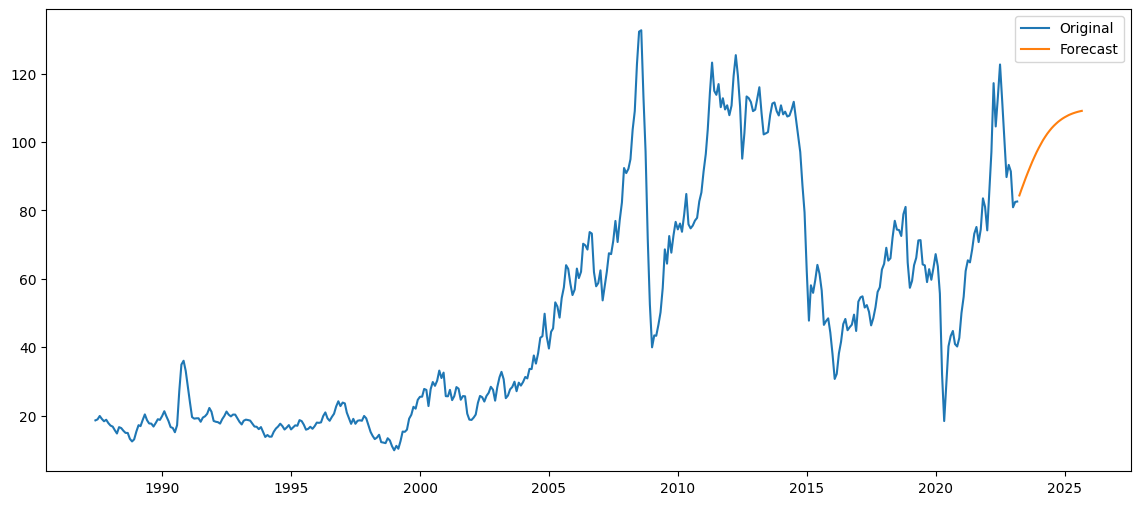

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df2, label='Original')
plt.plot(forecasted_data_final, label='Forecast')
#plt.plot(Prediction, label='Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
import joblib
joblib.dump(model1, 'model1.pkl')

['model1.pkl']

In [ ]:
import pickle
pickle.dump(model1, open('forecast_model.pickle','wb'))